# Robo_Advisor for Johannesburg Stock Exchange

It is estimated that over the last 5 years, between 70% and 80% of active equity fund managers failed to beat the JSE All Share Index.

This trend is common in markets all around the world. More investors are  choosing low-cost, passively managed funds over paying fees to fund managers who post sub-optimal returns.

I created this Robo-Advisor for investors to design their own portfolios and view historical returns for their selected stocks.

Levergaing historical data from the Yahoo Finance API, the program gives the user 1,3,5 and 10 year historical returns for the portfolio, based on the stocks weightings in the portfolio.

Self-managing a stock portfolio is daunting for many first-time investors. For that reason I added a function that returns the portfolio's risk and compares the returns to the benchmark. For this program we will make use of the Satrix Top 40 as our benchmark against which we measure our portfolio's performance.

# Import Relevant Libraries

In [5]:
import numpy as np
import pandas as pd
import pandas_datareader
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import datetime

# Extract Stock Codes

Using pandas we extract a table with all the stock codes for companies listed on the JSE as well as ETFs traded on the JSE.

Site used: https://www.african-markets.com

In [6]:
base_site = "https://www.african-markets.com/en/stock-markets/jse/listed-companies"

tables = pd.read_html(base_site)

tables[0].to_csv('jse_listed_co.csv')

listed_co = pd.read_csv('jse_listed_co.csv')

# Now we edit the data to make sure every symbol is in the format recognised by the Yahoo Finance API ()

listed_co['Symbol'] = listed_co['Symbol'].map(lambda x: x.rstrip('.ZA'))

listed_co['Symbol'] = listed_co['Symbol'].map(lambda x: x +'.JO')

listed_co.to_csv('JSE_All_Codes.csv') 

# Create a dictionary to easily access the stock codes:

co_dict = pd.read_csv('JSE_All_Codes.csv')
co_dict = dict(zip(listed_co.Symbol, listed_co.Company))

# Code for the Portfolio Program Functions

In [1]:
def portfolio_returns():
    
###     We import the relevant Python packages.
    
    import numpy as np
    import pandas as pd
    import pandas_datareader
    from pandas_datareader import data as wb
    import matplotlib.pyplot as plt
    import datetime
    
###     First we get the list of securities from the user.
    
    tickers = []
    while True:
        stock = input("Enter a stock code here (Type 'q' to quit): ")
        if stock == 'q':
            break
        tickers.append(stock)

###     Ask how much is to be invested:

    investment_total = input('How much money would you like to invest in total? R')
    
###     Next, we get all the codes for each company on the JSE:
    company_codes = pd.read_csv('JSE_All_Codes.csv')
    company_dict = dict(zip(company_codes.Symbol, company_codes.Company))
        
        
###     Next, we the weightings of each security in the portfolio.
    
    weight_list = []
    amounts = []
    for t in tickers:
        amount = input(f'Please enter the amount of {company_dict[t]} you would like to buy: (R {int(investment_total) - sum(amounts)} remaining): ')
        amounts.append(int(amount))
        weight_list.append(int(amount)/int(investment_total))
    if sum(weight_list) < 1:
        weight_list[-1] += 1 - sum(weight_list)
        print(f'You have not allocated your full investment amount, we have added the remaining R {int(investment_total)-sum(amounts)} to {company_dict[tickers[-1]]}.')
        
        
        
###     Create pandas dataframes for each time frame.
    
    data_1yr = pd.DataFrame()
    data_3yr = pd.DataFrame()
    data_5yr = pd.DataFrame()
    data_10yr = pd.DataFrame()
    
###     We obtain todays date so we get the most recent data.

    today = datetime.datetime.now()
    
###     We obtain the dates of exactly 1, 3, 5 and 10 years ago.

    one_year = str(today.year-1)+'-'+str(today.month)+'-'+str(today.day)
    three_years = str(today.year-3)+'-'+str(today.month)+'-'+str(today.day)
    five_years = str(today.year-5)+'-'+str(today.month)+'-'+str(today.day)
    ten_years = str(today.year-10)+'-'+str(today.month)+'-'+str(today.day)
    
###     Receive the data from the Yahoo Finance API.

    for t in tickers:
        data_1yr[t] = wb.DataReader(t,data_source='yahoo', start=one_year, end=str(today))['Adj Close']
        data_3yr[t] = wb.DataReader(t,data_source='yahoo', start=three_years, end=str(today))['Adj Close']
        data_5yr[t] = wb.DataReader(t,data_source='yahoo', start=five_years, end=str(today))['Adj Close']
        data_10yr[t] = wb.DataReader(t,data_source='yahoo', start=ten_years, end=str(today))['Adj Close']
        
###     We obtain the individual returns, annual returns and portfolio returns.
    
    ind_return_1 = (data_1yr/data_1yr.shift(1))-1
    ind_return_3 = (data_3yr/data_3yr.shift(1))-1
    ind_return_5 = (data_5yr/data_5yr.shift(1))-1
    ind_return_10 = (data_10yr/data_10yr.shift(1))-1
    
    ann_returns_1 = ind_return_1.mean()*253
    ann_returns_3 = ind_return_3.mean()*253
    ann_returns_5 = ind_return_5.mean()*253
    ann_returns_10 = ind_return_10.mean()*253
    
    port_return_1yr = np.dot(ann_returns_1,weight_list)
    port_return_3yr = np.dot(ann_returns_3,weight_list)
    port_return_5yr = np.dot(ann_returns_5,weight_list)
    port_return_10yr = np.dot(ann_returns_10,weight_list)
    
    print(f'Over the last year this portfolio has returned {round(port_return_1yr*100,2)}%.')
    print(f'Over the last 3 years this portfolio has returned {round(port_return_3yr*100,2)}% per annum.')
    print(f'Over the last 5 years this portfolio has returned {round(port_return_5yr*100,2)}% per annum.')
    print(f'Over the last 10 years this portfolio has returned {round(port_return_10yr*100,2)}% per annum.')
    
    all_norm = [[(data_1yr/data_1yr.iloc[0]*100).plot(title='1-YEAR NORMALISED RETURNS')],
               [(data_3yr/data_3yr.iloc[0]*100).plot(title='3-YEAR NORMALISED RETURNS')],
               [(data_5yr/data_5yr.iloc[0]*100).plot(title='5-YEAR NORMALISED RETURNS')],
               [(data_10yr/data_10yr.iloc[0]*100).plot(title='10-YEAR NORMALISED RETURNS')]]# Code for the Portfolio Program Functions




Enter a stock code here (Type 'q' to quit): SOL.JO
Enter a stock code here (Type 'q' to quit): NPN.JO
Enter a stock code here (Type 'q' to quit): FSR.JO
Enter a stock code here (Type 'q' to quit): MTN.JO
Enter a stock code here (Type 'q' to quit): q
How much money would you like to invest in total? R100000
Please enter the amount of Sasol Limited you would like to buy: (R 100000 remaining): 20000
Please enter the amount of Naspers Limited you would like to buy: (R 80000 remaining): 13000
Please enter the amount of Firstrand Limited you would like to buy: (R 67000 remaining): 24000
Please enter the amount of MTN Group Limited you would like to buy: (R 43000 remaining): 30000
You have not allocated your full investment amount, we have added the remaining R 13000 to MTN Group Limited.
Over the last year this portfolio has returned 108.03%.
Over the last 3 years this portfolio has returned 10.72% per annum.
Over the last 5 years this portfolio has returned 11.47% per annum.
Over the last 1

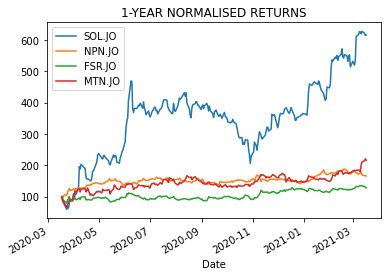

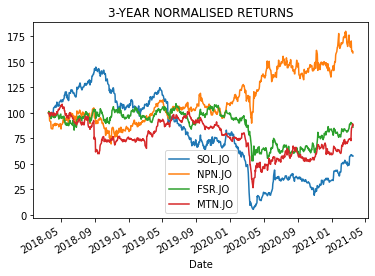

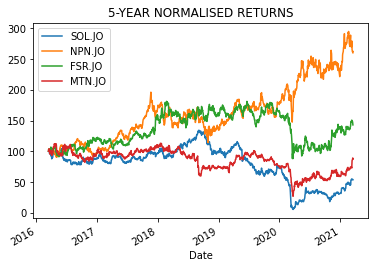

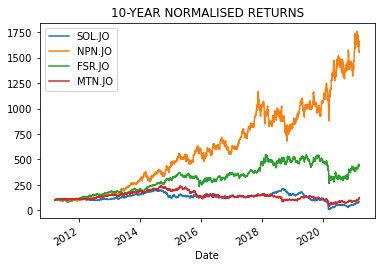

In [2]:
portfolio_returns()